# Tutorial 5: Polarimetry Reconstruction

In [1]:
#Import required system libraries for file management
import sys,importlib,os

# Provide path to oct-cbort library
module_path=os.path.abspath('/Users/damondepaoli/Documents/GitHub/oct-cbort')
if module_path not in sys.path:
    sys.path.append(module_path)

# Import oct-cbort library
from oct import *

# Choose a directory with all meta/ofd/ofb data within it
d = os.path.join(module_path,'examples/data/4_BL_Benchtop_Phantom_struct_angio_ps')
data = Load(directory = d)

### First we need to compute the tomogram, like we did in the previous tutorial but this time we will need to keep the stokes vectors, so we must manually add 'ps' to the process state again

In [2]:
data.reconstructionSettings['processState'] = 'struct+angio+ps+kspace'

tom = Tomogram(mode='heterodyne')
outtom = tom.reconstruct(data=data)
for key,val in outtom.items():
    data.processedData[key] = outtom[key]

## There are several different ways to create the various PS contrasts using the reconstruct library (oct.reconstruct.polarization).

#### Technique 1: Direct variable assignment without class instance

This technique is most like MATLAB, but does not take avantage of all the initialization that can be taken advantage of thanks to object oriented programming.

In [3]:
out = Polarization('rt').reconstruct(sv1=outtom['sv1'], sv2=outtom['sv2'], settings=data.psSettings)
for key,val in out.items():
    data.processedData[key] = out[key]

#### Technique 2: Create Structure instance -> direct variable assigment

Using this technique, we can keep the class in memory and continue to process other frames without needing to reinitialize and variables or memory space, important for GPU processing

In [4]:
ps = Polarization('rt')
out = ps.reconstruct(sv1=outtom['sv1'], sv2=outtom['sv2'], settings=data.psSettings)
for key,val in out.items():
    data.processedData[key] = out[key]

#### Technique 3 : Create Structure instance -> data object variable assigment

This method automatically grabs all the required tomograms and settings from the `data` object and reconstructs the contrast using it.

In [5]:
ps = Polarization('sym')
out = ps.reconstruct(data=data)
for key,val in out.items():
    data.processedData[key] = out[key]

## What is in "out"?

The processed dop, ret, oa and theta images reside in an output dictionary at `out['dop']` ,  `out['weight']`, `out['oa']` and `out['theta']` . 

Why use dictionaries? Because they're scalable and more outputs can be added later.

In [6]:
for key,val in out.items():
    if not (out[key] is None):
        print('Dictionary key ', key, ' : ', out[key].shape, out[key].dtype)
    else:
        print('Dictionary key ', key, ' : ', 'None' , 'None')

Dictionary key  dop  :  (2048, 1024) uint8
Dictionary key  ret  :  (2048, 1024) uint8
Dictionary key  oa  :  (2048, 1024, 3) uint8
Dictionary key  theta  :  (2048, 1024) uint8


## Let's look at the frames

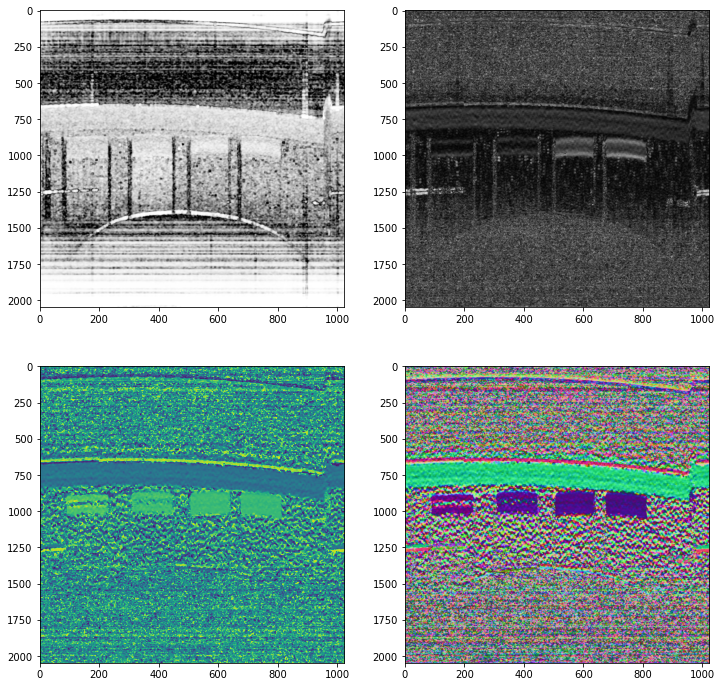

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221)
ax.imshow(data.processedData['dop'], cmap='gray', aspect='auto')
ax = fig.add_subplot(222)
ax.imshow(data.processedData['ret'], cmap='gray', aspect='auto')
ax = fig.add_subplot(223)
ax.imshow(data.processedData['theta'], aspect='auto')
ax = fig.add_subplot(224)
ax.imshow(data.processedData['oa'], aspect='auto')

## As Before, we can also view what `Polarization` requires

In [8]:
ps.requires()

Required:
sv1=sv1


Optional:


sv2=sv2


OR:
data=data


For settings changes:
settings=settings:


For reference, the whole settings dict and its defaults are:
self.settings[' imgWidth '] :  1024
self.settings[' maxRet '] :  180
self.settings[' binFract '] :  3
self.settings[' zOffset '] :  10
self.settings[' zResolution '] :  5.0
self.settings[' xFilter '] :  11
self.settings[' zFilter '] :  1
self.settings[' oopFilter '] :  1
self.settings[' dopThresh '] :  0.7
self.settings[' thetaOffset '] :  0
self.settings[' fastProcessing '] :  False
self.settings[' spectralBinning '] :  True
self.settings[' correctSystemOA '] :  True
self.settings[' fileInitialized '] :  True
